In [88]:
import numpy as np
import pandas as pd


In [89]:
#uploading the data
from google.colab import files
uploaded=files.upload()

Saving bird.csv to bird (4).csv


In [90]:
#look at data
bird_data = pd.read_csv("bird.csv")
bird_data.head()



,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [91]:
#understanding data
bird_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [92]:
#checking columns
bird_data.columns


Index(['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')

In [93]:
#making the column id  as primary index as it dosnt affect prediction
bird_data = bird_data.set_index('id')


In [94]:
#what type of unique output do we have
bird_data['type'].unique()



array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [95]:
#tells us how much missing value
bird_data.isna().sum()



,0
huml,1
humw,1
ulnal,3
ulnaw,2
feml,2
femw,1
tibl,2
tibw,1
tarl,1
tarw,1


In [96]:
#removing missing value and checking again
bird_data.dropna(how='any', inplace=True)
bird_data.isna().sum()



,0
huml,0
humw,0
ulnal,0
ulnaw,0
feml,0
femw,0
tibl,0
tibw,0
tarl,0
tarw,0


In [97]:
#checking number of rows and column
bird_data.shape


(413, 11)

In [98]:
#changes string output to int
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bird_data[['type']] = bird_data[['type']].apply(le.fit_transform)
bird_data.tail(20)


,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
id,,,,,,,,,,,
399,23.32,2.06,27.90,1.84,22.49,1.66,34.77,1.42,23.05,1.18,2
400,20.41,1.82,22.66,1.71,18.14,1.52,29.30,1.21,20.29,1.15,2
401,21.53,1.91,25.30,1.67,20.80,1.65,34.08,1.33,23.86,1.27,2
402,22.84,2.21,27.70,2.06,22.13,1.72,34.60,1.69,25.08,1.39,2
403,20.95,1.89,24.12,1.66,21.24,1.84,36.71,1.53,25.99,1.23,2
405,17.30,1.68,20.43,1.33,15.51,1.15,25.96,0.88,17.41,0.81,2
406,16.86,1.58,20.72,1.36,14.92,1.13,24.56,0.98,16.76,0.81,2
407,15.70,1.42,18.58,1.20,15.22,1.08,25.39,0.92,16.88,0.74,2
408,19.54,1.86,23.35,1.47,18.34,1.46,29.05,1.35,19.68,1.08,2


In [99]:
#seperating input and output
y = bird_data['type']
X = bird_data.drop(['type'], axis=1)


In [100]:
#one hot encoding after label encoding
from keras import utils

num_classes = 6
y = utils.to_categorical(y, num_classes)


In [101]:
#splitting test and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)


In [102]:
#checking test and training data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(330, 10)
(83, 10)
(330, 6)
(83, 6)


In [103]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)#Look at this data and LEARN something from it.
X_test = sc.transform(X_test)#Use what you already learned and APPLY it.



In [104]:
from keras.models import Sequential
from keras.layers import Dense
#initializing ann model
classifier = Sequential()
#adding first hidden layer
classifier.add(
    Dense(
        units=8,#8 neuron
        kernel_initializer='uniform',#random weights distibution
        activation='relu',
        input_dim=10#input feature
    )
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
#2nd hidden layer
classifier.add(Dense(
    units=16,
    kernel_initializer='uniform',
    activation='relu'
))


In [106]:
#3rd hidden layer
classifier.add(Dense(
    units=32,
    kernel_initializer='uniform',
    activation='relu'
))


In [107]:
#output layer
classifier.add(Dense(
    units=6,#output
    kernel_initializer='uniform',
    activation='softmax'
))


In [108]:
#how will it learn
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [109]:
#training starts
classifier.fit(
    X_train,
    y_train,
    batch_size=16,#16 samples processed at once
    epochs=100,#100 epochs → model sees data 100 times
    verbose=1#learning shown
)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2709 - loss: 1.7895
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4178 - loss: 1.7778 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 1.7590 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4989 - loss: 1.6951 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4811 - loss: 1.5973 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4768 - loss: 1.4867 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4753 - loss: 1.4338 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 1.3435 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4971 - loss: 1.3567 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5141 - loss: 1.2889 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5223 - loss: 1.2621 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [110]:
score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print("Train accuracy:", acc)

score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print("Test accuracy:", acc)



33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7502 - loss: 0.6541
Train accuracy: 0.7666666507720947
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.6987  
Test accuracy: 0.7349397540092468


In [111]:
#produces law probabilities for confusion matrix
pred = classifier.predict(X_test)



1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [112]:
#Converts one-hot → single label
import numpy as np

y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)



In [113]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm


array([[ 3,  0,  1,  0,  0,  2],
       [ 0,  7,  0,  0,  2,  2],
       [ 0,  0, 31,  0,  0,  0],
       [ 1,  0,  1, 16,  0,  2],
       [ 1,  2,  0,  0,  0,  0],
       [ 3,  0,  0,  5,  0,  4]])

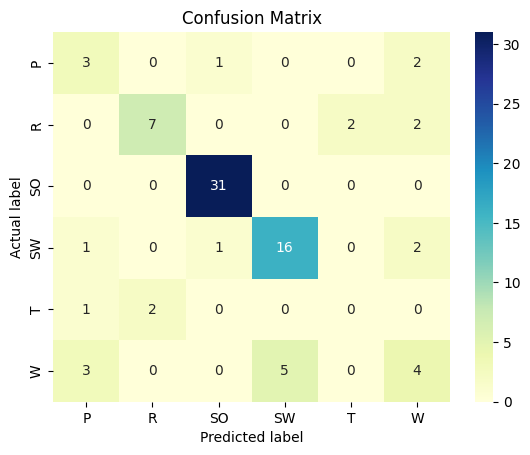

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['P', 'R', 'SO', 'SW', 'T', 'W']

sns.heatmap(cm, annot=True, xticklabels=target_names,
            yticklabels=target_names, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix")
plt.show()


In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

           P       0.38      0.50      0.43         6
           R       0.78      0.64      0.70        11
          SO       0.94      1.00      0.97        31
          SW       0.76      0.80      0.78        20
           T       0.00      0.00      0.00         3
           W       0.40      0.33      0.36        12

    accuracy                           0.73        83
   macro avg       0.54      0.54      0.54        83
weighted avg       0.72      0.73      0.73        83



In [116]:

classifier.save("bird_ann_model.h5")


In [117]:
import pickle

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)



In [118]:
from google.colab import files

files.download("bird_ann_model.h5")
files.download("scaler.pkl")
files.download("label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>